<a href="https://colab.research.google.com/github/satani99/fastai_22_2/blob/main/matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [4]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 Jul  5 06:59 mnist.pkl.gz


In [5]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin')

In [6]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [7]:
def chunks(x, sz):
  for i in range(0, len(x), sz): yield x[i:i+sz]

In [8]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

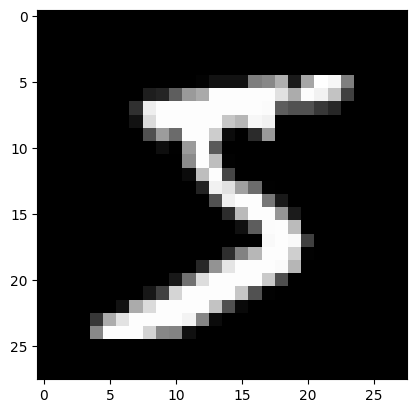

In [9]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [10]:
from itertools import islice

In [11]:
it = iter(vals)
islice(it, 5)

In [12]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [13]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [14]:
list(islice(it, 5))

[]

In [15]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

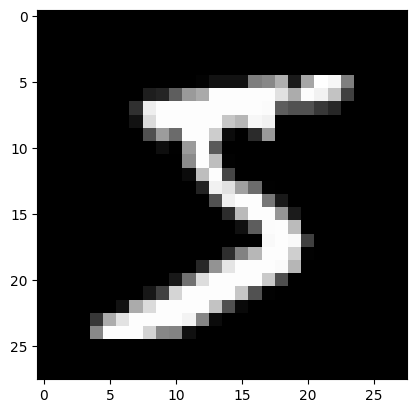

In [16]:
plt.imshow(img);

In [17]:
img[20][15]

0.98828125

In [18]:
class Matrix:
  def __init__(self, xs): self.xs = xs
  def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [19]:
m = Matrix(img)
m[20, 15]

0.98828125

In [20]:
import torch
from torch import tensor

In [21]:
tensor([1, 2, 3])

tensor([1, 2, 3])

In [22]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [23]:
x_train.shape

torch.Size([50000, 784])

In [24]:
x_train.type()

'torch.FloatTensor'

In [25]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

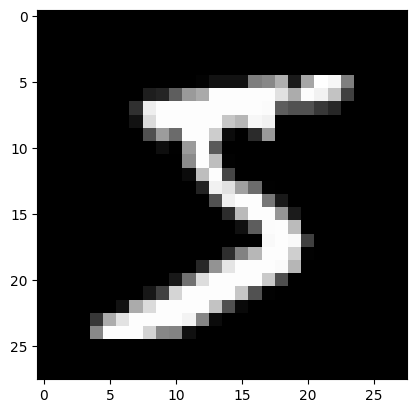

In [26]:
plt.imshow(imgs[0])

In [27]:
imgs[0, 20, 15]

tensor(0.9883)

In [28]:
n, c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [29]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [30]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

In [31]:
rnd_state = None
def seed(a):
  global rnd_state
  a, x = divmod(a, 30268)
  a, y = divmod(a, 30306)
  a, z = divmod(a, 30322)
  rnd_state = int(x)+1, int(y)+1, int(z)+1

In [32]:
seed(457435656543)
rnd_state

(3548, 20460, 499)

In [33]:
def rand():
  global rnd_state
  x, y, z = rnd_state
  x = (171 * x) % 30269
  y = (172 * y) % 30307
  z = (170 * z) % 30323
  rnd_state = x, y, z
  return (x/30269 + y/30307 + z/30323) % 1.0

In [34]:
rand(), rand(), rand()

(0.957168523495474, 0.9940199377171632, 0.3033184219283851)

In [35]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
  print(f'In child: {torch.rand(1)}')
  os._exit(os.EX_OK)

In parent: tensor([0.2404])
In child: tensor([0.2404])


In [36]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
  print(f'In child: {torch.rand(1)}')
  os._exit(os.EX_OK)

In parent: tensor([0.1877])
In child: tensor([0.1877])


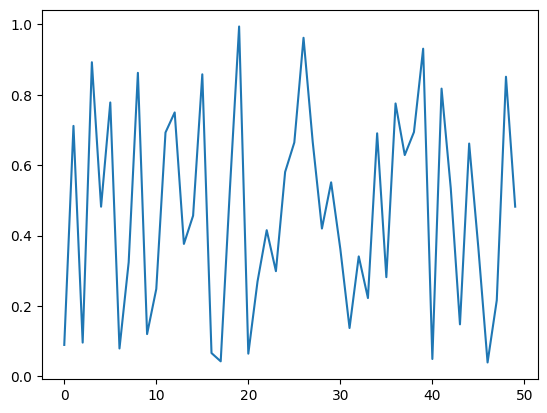

In [37]:
plt.plot([rand() for _ in range(50)]);

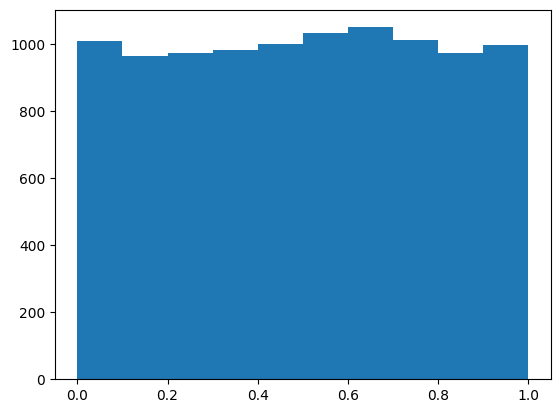

In [38]:
plt.hist([rand() for _ in range(10000)]);

In [39]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

5.12 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
%timeit -n 10 torch.randn(784, 10)

122 µs ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [42]:
m1 = x_valid[:5]
m2 = weights

In [43]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [44]:
ar, ac = m1.shape
br, bc = m2.shape
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [45]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [46]:
for i in range(ar):
  for j in range(bc):
    for k in range(ac):
      t1[i, j] += m1[i, k] * m2[k, j]

In [47]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [48]:
t1.shape

torch.Size([5, 10])

In [49]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [50]:
def matmul(a, b):
  (ar, ac), (br, bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
      for k in range(ac): c[i, j] += a[i, k] * b[k, j]
  return c

In [51]:
%time _=matmul(m1, m2)

CPU times: user 1.03 s, sys: 0 ns, total: 1.03 s
Wall time: 1.09 s


In [52]:
ar*bc*ac

39200

In [53]:
from numba import njit

In [54]:
@njit
def dot(a, b):
  res = 0.
  for i in range(len(a)): res += a[i]*b[i]
  return res

In [55]:
from numpy import array

In [58]:
%time dot(array([1.,2.,3.]), array([2.,3.,4.]))

CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 53.6 µs


20.0

In [63]:
def matmul(a, b):
  (ar,ac),(br,bc) = a.shape,b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc): c[i, j] = dot(a[i, :], b[:, j])
  return c

In [64]:
m1a, m2a = m1.numpy(), m2.numpy()

In [65]:
from fastcore.test import *

In [66]:
test_close(t1, matmul(m1a, m2a))

In [67]:
%timeit -n 50 matmul(m1a, m2a)

529 µs ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [69]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a, b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [70]:
a + b

tensor([12., 14.,  3.])

In [71]:
(a < b).float().mean()

tensor(0.67)

In [72]:
m = tensor([[1., 2, 3], [4, 5, 6], [7, 8, 9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [73]:
sf = (m*m).sum()

In [74]:
sf.sqrt()

tensor(16.88)

In [75]:
m[2,:], m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [76]:
m[2]

tensor([7., 8., 9.])

In [77]:
def matmul(a, b):
  (ar, ac), (br, bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
  return c

In [78]:
test_close(t1, matmul(m1, m2))

In [80]:
%timeit -n 50 _=matmul(m1, m2)

1.4 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
